In [1]:
from mdagent import MDAgent

In [2]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-07-26
time: 10:27:30


In [3]:
descriptive_prompt_4 = "Complete the following MD tasks: 1. Download the PDB file 1ZNI. 2. Pre-process the file by adding missing atoms and replacing non-standard residues. 3. Simulate for 1 ps at 300 K. 4. Calculate the RMSD of the simulation."
non_descriptive_prompt_4 = "Simulate protein 1ZNI at 300 K for 1 ps and calculate the RMSD."

In [4]:
llm_model = "gpt-4o-2024-05-13"
tools = "all"

In [5]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

##### descriptive prompt

In [6]:
start1 = datetime.datetime.now()
agent_1.run(descriptive_prompt_4)

Thought: To complete the tasks, I need to follow these steps:
1. Download the PDB file 1ZNI.
2. Pre-process the file by adding missing atoms and replacing non-standard residues.
3. Set up and run a 1 ps simulation at 300 K.
4. Calculate the RMSD of the simulation.

I will start by downloading the PDB file 1ZNI.

Action: 
```
{
  "action": "PDBFileDownloader",
  "action_input": "1ZNI"
}
```PDB file found with this ID: 1ZNI


2024-07-26 10:27:37.011 
  command:

    streamlit run /opt/anaconda3/envs/mdagent/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To continue with the tasks, I will now pre-process the downloaded PDB file (1ZNI_102737) by adding missing atoms and replacing non-standard residues.

Action:
```
{
  "action": "CleaningToolFunction",
  "action_input": {
    "pdb_id": "1ZNI_102737",
    "replace_nonstandard_residues": true,
    "add_missing_atoms": true,
    "remove_heterogens": false,
    "remove_water": false,
    "add_hydrogens": false
  }
}
```
file path: /Users/quinny/repos/md-agent/ckpt/ckpt_3/pdb/1ZNI_raw_20240726_102737.pdb
To continue with the tasks, I will now set up and run a 1 ps simulation at 300 K using the pre-processed PDB file (1ZNI_102740).

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_102740",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      

('The tasks have been successfully completed. Here is the summary of each step:\n\n1. **Download the PDB file 1ZNI**:\n   - Successfully downloaded the PDB file with ID: `1ZNI_102737`.\n\n2. **Pre-process the file by adding missing atoms and replacing non-standard residues**:\n   - Successfully cleaned the file by adding missing atoms, replacing non-standard residues, and adding hydrogens. The cleaned file ID is: `1ZNI_102800`.\n\n3. **Simulate for 1 ps at 300 K**:\n   - Successfully set up and ran a 1 ps simulation at 300 K using the cleaned PDB file. The simulation generated the following files:\n     - Simulation trajectory: `rec0_102807`\n     - Simulation state log: `rec1_102807`\n     - Simulation PDB frames: `rec2_102807`\n     - Initial topology file: `top_sim0_102807`\n\n4. **Calculate the RMSD of the simulation**:\n   - Successfully calculated the RMSD of the simulation. The RMSD data is saved to a CSV file with ID: `rmsd_102807`. The RMSD plot is saved with plot ID: `fig0_10

In [7]:
end = datetime.datetime.now()
elapsed = end - start1
print(f"agent_1 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_1 duration: 1.06 minutes


In [8]:
agent_1.path_registry.list_path_names()

'Names found in registry: 1ZNI_102737, 1ZNI_102740, 1ZNI_102749, 1ZNI_102800, top_sim0_102807, sim0_102807, rec0_102807, rec1_102807, rec2_102807, rmsd_102807, fig0_102828'

In [9]:
registry = agent_1.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_102737, 1ZNI_102740, 1ZNI_102749, 1ZNI_102800, top_sim0_102807, sim0_102807, rec0_102807, rec1_102807, rec2_102807, rmsd_102807, fig0_102828


In [10]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_102737: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_102737
 1ZNI_102740: Cleaned File:  Replaced Nonstandard Residues. Missing Atoms Added and replaces nonstandard residues. 
 1ZNI_102749: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 1ZNI_102800: Cleaned File:  Removed Heterogens
 and Water Kept.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_102807: Initial positions for simulation sim0_102807
 sim0_102807: Basic Simulation of Protein 1ZNI_102800
 rec0_102807: Simulation trajectory for protein 1ZNI_102800 and simulation sim0_102807
 rec1_102807: Simulation state log for protein 1ZNI_102800 and simulation sim0_102807
 rec2_102807: Simulation pdb frames for protein 1ZNI_102800 and simulation sim0_102807
 rmsd_102807: RMSD for 102807
 fig0_102828: RMSD plot for 102807


In [11]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

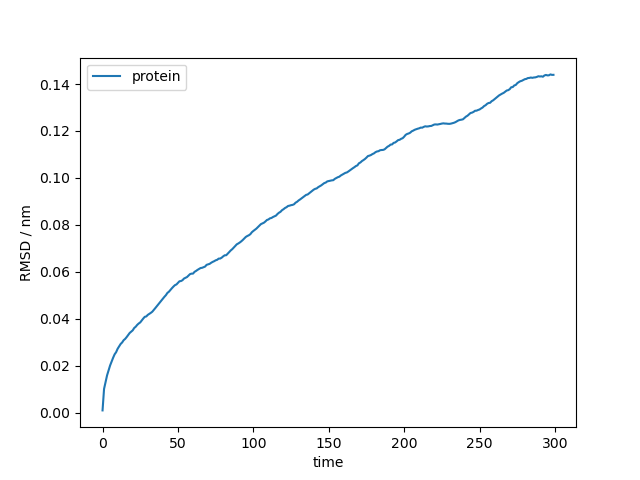

In [12]:
from IPython.display import Image
Image(filename=plot_path)

##### non-descriptive prompt

In [13]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
start2 = datetime.datetime.now()
agent_2.run(non_descriptive_prompt_4)

Thought: To simulate the protein 1ZNI at 300 K for 1 ps and calculate the RMSD, I need to follow these steps:
1. Download the PDB file for protein 1ZNI.
2. Set up and run a short simulation of the protein at 300 K for 1 ps.
3. Calculate the RMSD of the resulting trajectory.

First, I will download the PDB file for protein 1ZNI.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1ZNI"
}
```PDB file found with this ID: 1ZNI
To proceed with the simulation of protein 1ZNI at 300 K for 1 ps, I will set up and run a short simulation using the downloaded PDB file. After that, I will calculate the RMSD of the resulting trajectory.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_105109",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinM

('The simulation of protein 1ZNI at 300 K for 1 ps has been successfully completed, and the RMSD of the resulting trajectory has been calculated. Here are the details:\n\n- **Simulation Summary**:\n  - Simulation trajectory file ID: `rec0_105133`\n  - Simulation state log file ID: `rec1_105133`\n  - Simulation PDB frames file ID: `rec2_105133`\n  - Standalone script file ID: `sim0_105133`\n  - Initial topology file ID: `top_sim0_105133`\n\n- **RMSD Calculation**:\n  - RMSD data saved to CSV file ID: `rmsd_105133`\n  - RMSD plot saved with plot ID: `fig0_105149`\n\nFinal Answer: The simulation of protein 1ZNI at 300 K for 1 ps has been successfully completed, and the RMSD of the resulting trajectory has been calculated. The RMSD data is saved in the file with ID `rmsd_105133`, and the RMSD plot is saved with plot ID `fig0_105149`.',
 'W7M307F7')

In [14]:
end = datetime.datetime.now()
elapsed = end - start2
print(f"agent_2 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_2 duration: 0.91 minutes


In [15]:
registry = agent_2.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_105109, 1ZNI_105127, top_sim0_105133, sim0_105133, rec0_105133, rec1_105133, rec2_105133, rmsd_105133, fig0_105149


In [16]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1ZNI_105109: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_105109
 1ZNI_105127: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_105133: Initial positions for simulation sim0_105133
 sim0_105133: Basic Simulation of Protein 1ZNI_105127
 rec0_105133: Simulation trajectory for protein 1ZNI_105127 and simulation sim0_105133
 rec1_105133: Simulation state log for protein 1ZNI_105127 and simulation sim0_105133
 rec2_105133: Simulation pdb frames for protein 1ZNI_105127 and simulation sim0_105133
 rmsd_105133: RMSD for 105133
 fig0_105149: RMSD plot for 105133


In [17]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

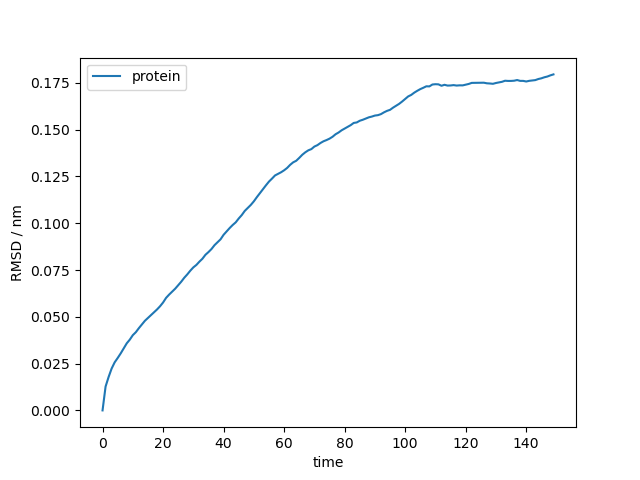

In [18]:
from IPython.display import Image
Image(filename=plot_path)